[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/https://github.com/carlosandrade25/INDE-577-Carlos-Andrade/blob/main/Initial Analysis/Gradient Descent.ipynb)

 <h1 align="center">GRADIENT DESCENT</h1>

Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model. Parameters refer to coefficients in Linear Regression and weights in neural networks. (Source. Khan Academy). Gradient descent is best used when the parameters cannot be calculated analytically (e.g. using linear algebra) and must be searched for by an optimization algorithm. 


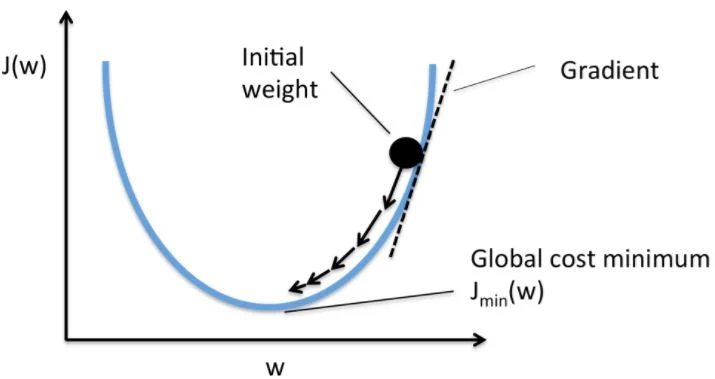


# Task

This is the first an only project not related to the coffee data base. In this project, the idea is to implement the Gradient descent algorithm from scratch without using the code used in class. The algorithm is tested for a one-dimensional and two dimensional functions differentiable in a specific numerical range. 



# One dimensional function

The function $ x^3-3x^2 + 5 $ is tested. This function is well behaved, with a minimum each time x = y. Furthermore, it has not got many different local minimum which can be problematic for gradient descent algorithm.

In [2]:
from numpy import asarray
from numpy import arange
from numpy.random import rand
import matplotlib.pyplot as plt


In [161]:
def objective(x):
    return x**3 - 3*x**2 + 5
 
# derivative of objective function
def derivative(x):
    return 3*x**2 - 6*x
 
# gradient descent algorithm
#def gradient_descent(objective, derivative, bounds, n_iter, step_size, initial_point, precision):
def gradient_descent(objective, derivative, step_size, initial_point, precision):
    # track all solutions
    solutions, scores = list(), list()
    gradient_new = initial_point
    gradient_old = 0
    counter=0

    while (gradient_new- gradient_old) > precision:
        counter=counter+1
        gradient_old= gradient_new
        gradient_new = gradient_old - (step_size * derivative(gradient_old))
        # evaluate candidate point
        solution_eval = objective(gradient_new)
        # store solution
        solutions.append(gradient_new)
        scores.append(solution_eval)
        # report progress
      #  print('Interaction %d f(%s) = %.5f' % (counter, round (gradient_new, 5), solution_eval))
    return solutions, scores, counter

### Implementing the gradient descent in the 2-d function

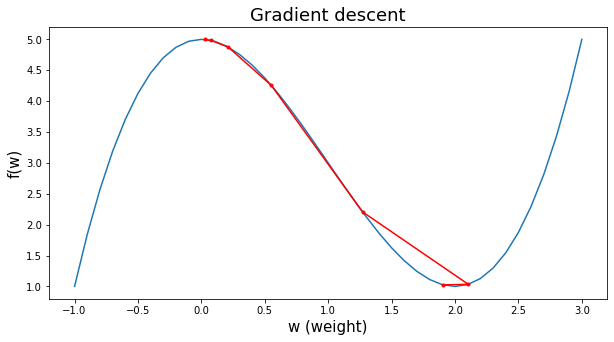

In [191]:
# define range for input
bounds = asarray([[-1.0, 3.0]])
# define the total iterations
#n_iter = 15
# define the step size
step_size = 0.3
initial_point= 0.01
precision= 0.0001
# perform the gradient descent search
solutions, scores, counter = gradient_descent(objective, derivative, step_size, initial_point, precision)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
plt.figure(figsize=[10,5])
# create a line plot of input vs result
plt.plot(inputs, results)
# plot the solutions found
plt.plot(solutions, scores, '.-', color='red')
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.title("Gradient descent", fontsize = 18)
plt.show()
# show the plot

### Step size sensitivity analysis
The efect of the step size for this particular function is analized as follow. We get the number of iteration for an step size from 0.1 to 0.8, with 0.01 increments. The inital point and precision is fixed. The result is presented in the following plot.

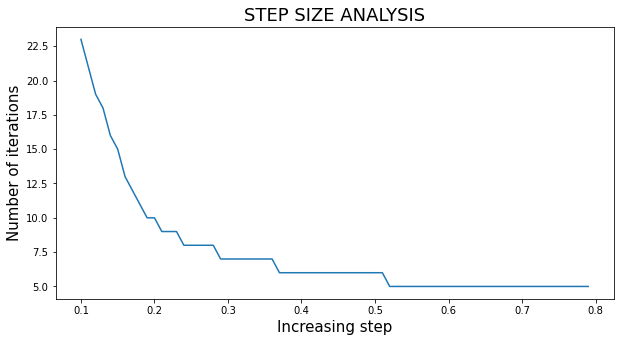

In [192]:
step_size = np.arange(0.1, 0.8, 0.01)
initial_point= 0.01
precision= 0.0001
result = []
for i in (step_size):
# Gdetting the number of iteraction for each step
    solutions, scores, counter = gradient_descent(objective, derivative, i, initial_point, precision)
    result.append(counter)
plt.figure(figsize=[10,5])
plt.plot(step_size, result)
plt.xlabel("Increasing step", fontsize = 15)
plt.ylabel("Number of iterations", fontsize = 15)
plt.title("STEP SIZE ANALYSIS", fontsize = 18)
plt.show()


# Two dimensional Function
The function z= $x^2 + y^2 - 2xy$ is tested. This function is well behaved, with a minimum each time x = y. Furthermore, it has not got many different local minimums, which can be problematic for the gradient descent algorithm. I drew the 3D and contour plot for this function and subsequently calculated the gradient descent and the number of required interactions to satisfy a precision value. 

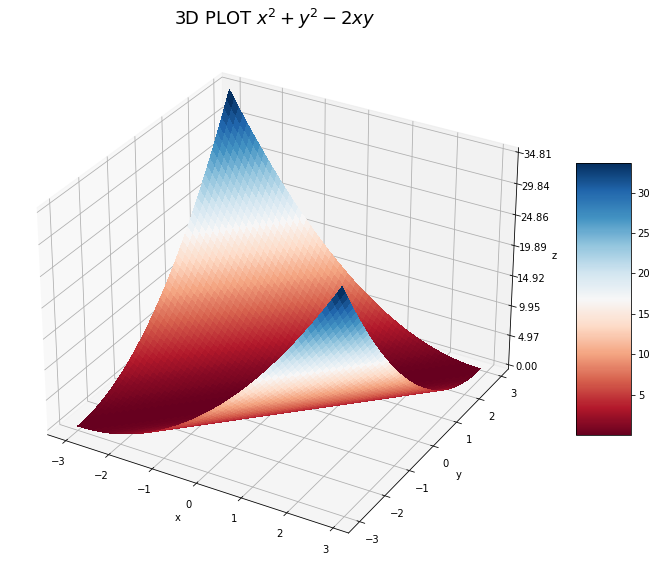

In [4]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


# the function I'm plotting
def z_func(x,y):
    return  x**2 + y**2 - 2*x*y
 
x = arange(-3.0,3.0,0.1)
y = arange(-3.0,3.0,0.1)

# grid of point
X,Y = meshgrid(x, y) 
# evaluation of the function on the grid
Z = z_func(X, Y) 

fig = plt.figure(figsize=[12,10])
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(8))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('3D PLOT $x^2+y^2-2xy$', fontsize = 18)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()



###  Finding the result of interactions in the 3D function

In [195]:
from sympy import *

x = Symbol('x')
y = Symbol('y')
z = Symbol('z')

f = x**2 + y**2 - 2*x*y
# First partial derivative with respect to x
fpx = f.diff(x)

# First partial derivative with respect to y
fpy = f.diff(y)

# Gradient
grad = [fpx,fpy]

# Data
theta = 10         #initial point x
theta1 = 3         #initial point y
step_size = 0.1  
count = 0
precision = 0.00001
printData = True
maxIterations = 1000

while True:
    temptheta = theta - step_size*N(fpx.subs(x,theta).subs(y,theta1)).evalf()
    temptheta1 = theta1 - step_size*N(fpy.subs(y,theta1)).subs(x,theta).evalf()

    #If the number of iterations goes up too much, maybe theta is diverging. Stop, the function may not be convex
    count += 1
    if count > maxIterations:
        print("Adjust the step size and make sure that the function is convex")
        printData = False
        break

    # Verify the differece between the current value and presvious value is less than the precision, if yes, finish
    if abs(temptheta-theta) < precision and abs(temptheta1-theta1) < precision:
        break

    # Update
    theta = temptheta
    theta1 = temptheta1

if printData:
    print("The function "+str(f)+" converges to a minimum")
    print("Number of iterations:",count,sep=" ")
    print("Theta (x0) =",temptheta,sep=" ")
    print("Theta1 (y0) =",temptheta1,sep=" ")
  
    


The function x**2 - 2*x*y + y**2 converges to a minimum
Number of iterations: 25
Theta (x0) = 6.50000995060081
Theta1 (y0) = 6.49999004939919


### Result
The gradient descent finds a minimun starting at points 10 and 3, after 25 interactions, using a step size of 0.1. The minimal occurs in the point (6.5, 6.5) which can be verfiy in the 3D plot as well. 
